In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import random
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
def read_train():
    data_path='Data/';
    data = os.listdir(data_path);
    for files in data:
        with open(os.path.join(data_path,files),newline='',encoding="utf-8") as f:

            rows=csv.reader(f, delimiter=',');
            if(files=='train_1.csv'):
                train=[];
                line_count = 0;
                for row in rows:
                    if line_count == 0: #skip first row
                        line_count += 1;
                    else:
                        train.append([row[0],row[1:]]);
    return train;

In [3]:
def check_acf(df):
    end=100;
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

    #only check first 20 elements
    df=df[:20];
    df.value=df.value.astype(int);
    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df.value[:end]); axes[0, 0].set_title('Original Series')
    plot_acf(df.value[:end], ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df.value[:end].diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df.value[:end].diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df.value[:end].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(df.value[:end].diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

In [4]:
def check_pacf(df):
    end=100;
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

    #only check first 20 elements
    df=df[:20];
    df.value=df.value.astype(int);
    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df.value[:end]); axes[0, 0].set_title('Original Series')
    plot_pacf(df.value[:end], ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df.value[:end].diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_pacf(df.value[:end].diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df.value[:end].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_pacf(df.value[:end].diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

In [5]:
def check_histogram(train):
    page_index=0;
    missing_element=np.zeros(len(train));
    for page in train:
        date_index=0;
        for view in page[1]:
            if(view==""):#found empty element
                missing_element[page_index]+=1;
            date_index+=1;    
        page_index+=1;
    lost=0;
    for i in missing_element:
        if i!=0:
            lost+=1;
    print(lost);
    print(np.size(missing_element));
    plt.hist(missing_element,bins=200,range=(1,550));

In [6]:
def check_residual_and_forcast(model):
    residuals = pd.DataFrame(model_fit.resid)
    fig, ax = plt.subplots(1,2)
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()
    # Actual vs Fitted
    model_fit.plot_predict(dynamic=False)
    plt.show()
    return residuals;

In [7]:
train=read_train();

In [8]:
#check_histogram(train);

In [30]:
#check_pacf(df);

In [31]:
#model = ARIMA(df.value, order=(2,0,2))
#model_fit = model.fit(disp=0)
#print(model_fit.summary())

In [34]:
#residuals=check_residual_and_forcast(model);

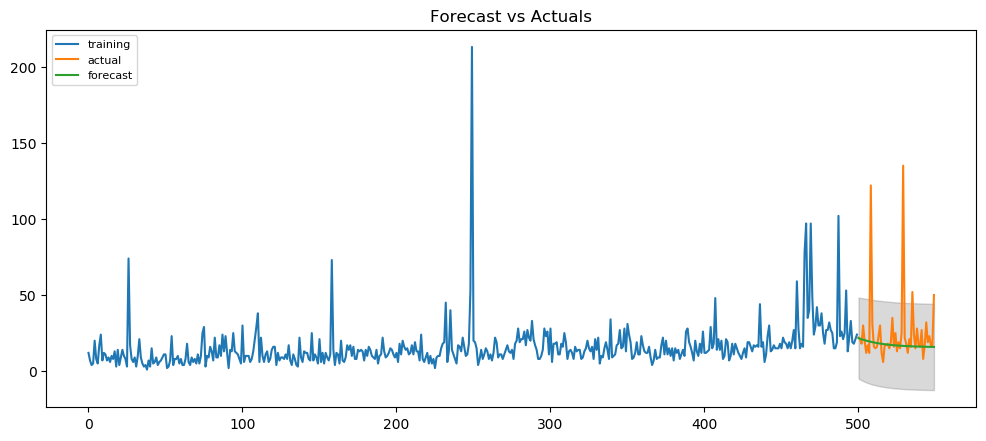

In [32]:
'''
# Create Training and Test
train0 = df.value[:500]
test = df.value[500:]

# Build Model
model = ARIMA(train0, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(50)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train0, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
'''

In [ ]:
day_prediction=64; #the number of days we need to predict
no_need_prediction=2; #the number of days we skip in prediction
submission=[]; #the content of submission tempor file

for i in range(len(train)):#
    train[i][1]= [str(np.random.randint(2, size=1)[0]) if x == '' else x for x in train[i][1]]
        #if the element is missing, add 0 or 1 using 50%/50%
    df = pd.DataFrame(train[i][1],columns=['value']) 
    df.value=df.value.astype(float); 
    df.value=np.sqrt(df.value); #take square root to avoid non-staionary 
    train0 = df.value 
    sarima = SARIMAX(df.value,order=(2,0,2),initialization='approximate_diffuse').fit()#,enforce_invertibility=False,enforce_stationarity=False 
    #fit the ARIMA model 
 
    # Forecast 
    pred = sarima.predict(550,550+day_prediction); 
    a=pred.tolist(); 
    a=a[no_need_prediction:]; #skip the days 
    a = [round(pow(x,2)) for x in a]; #take square, and rounding 
    b=[train[i][0]]+a # add page name 
    #print(i); 
    submission.append(b);

In [10]:
#6527
with open('Data/subs.csv', 'w', newline='',encoding="utf-8") as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for s in submission:
        spamwriter.writerow(s);